In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape, test.shape)

(20800, 5) (5200, 5)


In [4]:
test.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [5]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
label       0
dtype: int64


In [7]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Creating Wordcloud Visuals

In [8]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

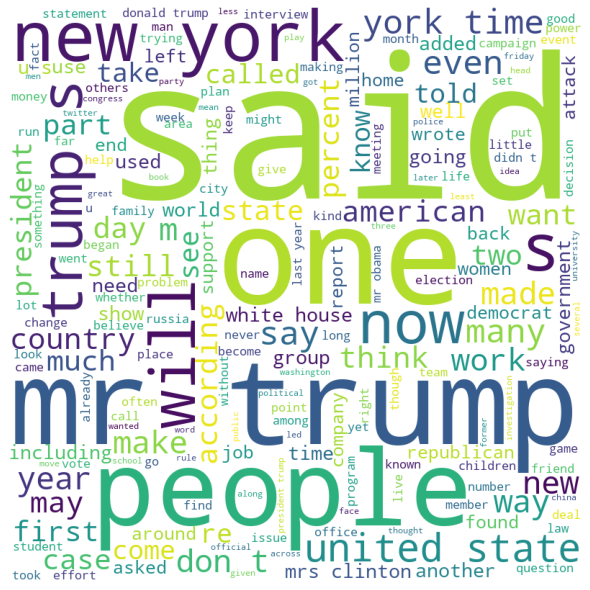

In [9]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

# 1. Regex

In [10]:
#Remove punctuations from the String  
s = "!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [11]:
s = re.sub(r'[^\w\s]','',s)

# if any substring doesn't hold words or space

In [12]:
print(s)

 hello please subscribe to the channel 


# 2. Tokenization

In [13]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [14]:
nltk.word_tokenize("Hello how are you")

['Hello', 'how', 'are', 'you']

# 3. StopWords

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
stop_words.append('helo')

In [17]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [18]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [19]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

# 4. Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities mice"

In [21]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


# Let's Apply

In [22]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


In [23]:
train = train[['total','label']]

# Applying NLP Techniques

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
X_train = train['total']
Y_train = train['label']

# Bag-of-words / CountVectorizer

In [26]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# TF-iDF Vectorizer

In [28]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [29]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [30]:
#'hello how  doing','hi  doing fine'

In [31]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

# Let's Apply

In [32]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [33]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

# Confusion Matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Modelling

In [35]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [36]:
print(X_train.shape,X_test.shape)

(15600, 220387) (5200, 220387)


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression# Logistic Regression

In [38]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
l_pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test,l_pred)
cm

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98


array([[2493,   71],
       [  44, 2592]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [41]:
logreg_acc = accuracy_score(y_test ,l_pred)
logreg_prec=precision_score(y_test ,l_pred, average = 'weighted')
logreg_rec=recall_score(y_test ,l_pred,  average = 'weighted')
logreg_f1=f1_score(y_test ,l_pred,  average = 'weighted')
print("logreg Accuracy(test): ",logreg_acc)
print("logreg Precision(test): ",logreg_prec)
print("logreg Recal(test): ",logreg_rec)
print("logreg F1_score(test): ",logreg_f1)

logreg Accuracy(test):  0.9778846153846154
logreg Precision(test):  0.9779329990777587
logreg Recal(test):  0.9778846153846154
logreg F1_score(test):  0.9778824284076316


In [42]:
print(classification_report(y_test ,l_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2564
           1       0.97      0.98      0.98      2636

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



# MultinomialNB

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

In [44]:
NB_acc = accuracy_score(y_test , pred)
NB_prec=precision_score(y_test , pred)
NB_rec=recall_score(y_test , pred)
NB_f1=f1_score(y_test , pred)
print("NB Accuracy(test): ",NB_acc)
print("NB Precision(test): ",NB_prec)
print("NB Recal(test): ",NB_rec)
print("NB F1_score(test): ",NB_f1)

NB Accuracy(test):  0.8348076923076924
NB Precision(test):  0.9966461710452766
NB Recal(test):  0.6764036418816388
NB F1_score(test):  0.8058757062146893


In [45]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2564
           1       1.00      0.68      0.81      2636

    accuracy                           0.83      5200
   macro avg       0.87      0.84      0.83      5200
weighted avg       0.87      0.83      0.83      5200



# Random forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
rf = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)

rf_model = rf.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print('Accuracy of RF  classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))
cm = confusion_matrix(y_test,rf_pred)
cm


Accuracy of RF  classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.94


array([[2456,  108],
       [ 191, 2445]], dtype=int64)

In [48]:
rf_acc = accuracy_score(y_test ,rf_pred)
rf_prec=precision_score(y_test ,rf_pred)
rf_rec=recall_score(y_test ,rf_pred)
rf_f1=f1_score(y_test ,rf_pred)
print("RF Accuracy(test): ",rf_acc)
print("RF Precision(test): ",rf_prec)
print("RF Recal(test): ",rf_rec)
print("RF F1_score(test): ",rf_f1)

RF Accuracy(test):  0.9425
RF Precision(test):  0.9576968272620446
RF Recal(test):  0.9275417298937785
RF F1_score(test):  0.9423781075351706


In [49]:
print(classification_report(y_test ,rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2564
           1       0.96      0.93      0.94      2636

    accuracy                           0.94      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.94      0.94      0.94      5200



# Decision Tree 

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
print('Accuracy of DT  classifier on training set: {:.2f}'
     .format(DT.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(DT.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of DT  classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.96


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

In [51]:
DT_acc = accuracy_score(y_test ,DT_pred)
DT_prec=precision_score(y_test ,DT_pred)
DT_rec=recall_score(y_test ,DT_pred)
DT_f1=f1_score(y_test ,DT_pred)
print("DT Accuracy(test): ",DT_acc)
print("DT Precision(test): ",DT_prec)
print("DT Recal(test): ",DT_rec)
print("DT F1_score(test): ",DT_f1)

DT Accuracy(test):  0.9567307692307693
DT Precision(test):  0.9540489642184558
DT Recal(test):  0.9609256449165402
DT F1_score(test):  0.9574749574749575


In [52]:
print(classification_report(y_test ,DT_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2564
           1       0.95      0.96      0.96      2636

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



# KNN classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
print('Accuracy of KNN  classifier on training set: {:.2f}'
     .format(KNN.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of KNN  classifier on training set: 0.90
Accuracy of KNN classifier on test set: 0.86


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

In [54]:
KNN_acc = accuracy_score(y_test ,KNN_pred)
KNN_prec=precision_score(y_test ,KNN_pred)
KNN_rec=recall_score(y_test ,KNN_pred)
KNN_f1=f1_score(y_test ,KNN_pred)
print("KNN Accuracy(test): ",KNN_acc)
print("KNN Precision(test): ",KNN_prec)
print("KNN Recal(test): ",KNN_rec)
print("KNN F1_score(test): ",KNN_f1)

KNN Accuracy(test):  0.8561538461538462
KNN Precision(test):  0.9221824686940966
KNN Recal(test):  0.7822458270106222
KNN F1_score(test):  0.8464696223316912


In [55]:
print(classification_report(y_test ,KNN_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2564
           1       0.92      0.78      0.85      2636

    accuracy                           0.86      5200
   macro avg       0.86      0.86      0.86      5200
weighted avg       0.87      0.86      0.86      5200



In [56]:
models= [['Logistic Regression',logreg_acc,logreg_prec,logreg_rec,logreg_f1],['MultinomialNB',NB_acc,NB_prec,NB_rec,NB_f1],['Random forest',rf_acc,rf_prec,rf_rec,rf_f1],['Decision Tree',DT_acc,DT_prec,DT_rec,DT_f1],['KNN classifier',KNN_acc,KNN_prec,KNN_rec,KNN_f1]]
  
# Create the pandas DataFrame
dfmodels= pd.DataFrame(models,   columns=['Algorithm Name','Accuracy','Precision',  'Recal',  'F1_score'])
  
# print dataframe.
dfmodels

,Algorithm Name,Accuracy,Precision,Recal,F1_score
0,Logistic Regression,0.977885,0.977933,0.977885,0.977882
1,MultinomialNB,0.834808,0.996646,0.676404,0.805876
2,Random forest,0.942500,0.957697,0.927542,0.942378
3,Decision Tree,0.956731,0.954049,0.960926,0.957475
4,KNN classifier,0.856154,0.922182,0.782246,0.846470


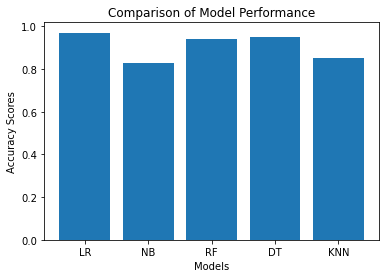

In [60]:
import matplotlib.pyplot as plt

# Model names
models = ['LR', 'NB', 'RF', 'DT', 'KNN']

# Accuracy scores
accuracy_scores = [0.97, 0.83, 0.94,0.95,0.85]

# Plotting the bar graph
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Model Performance')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score


In [65]:
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [66]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [67]:
import joblib as jb

In [68]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [70]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [71]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0], dtype=int64)

In [72]:
import joblib as jb

In [73]:
filename = 'pipeline.sav'
from joblib import dump,load

In [74]:
dump(pipeline, filename)

['pipeline.sav']

In [75]:
filename = './pipeline.sav'

# Prediction

In [76]:
loaded_model = load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result) 

[0]
